In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#pybrain net
import pybrain
from pybrain.datasets import UnsupervisedDataSet, SupervisedDataSet
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.tools.validation import Validator

#scikit-learn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
def mlp_trainer(X_train,y_train,in_vec=20,out_vec=3, train_length=1500):
    # X_train = array de entrenamiento: valores de entrada
    # y_train = array de entrenamiento: valores de salida
    # in_vec = longitud vector valores de entrada
    # out_vec = longitud vector valores de salida
    # train_length = Cantidad de ensayos de entrenamiento
    Dtrain = SupervisedDataSet(in_vec,out_vec) # define a dataset in pybrain
    [Dtrain.addSample(X_train[i],y_train[i]) for i in xrange(len(X_train))]
    validator =  Validator()
    net = buildNetwork(in_vec,4,out_vec, hiddenclass=pybrain.SigmoidLayer, outclass=pybrain.SigmoidLayer)
    T = BackpropTrainer(net, learningrate=0.01, momentum=0.99)
    scores = []
    for i in xrange(train_length):
        T.trainOnDataset(Dtrain, 1)
        prediction = net.activateOnDataset(Dtrain)
        scores.append(validator.MSE(prediction, Dtrain.getField('target')))
    plt.ylabel('Mean Square Error')
    plt.xlabel('Iteration')
    plt.plot(scores)
    print("**** Respuestas de entrenamiento")
    print(pd.DataFrame([[net.activate(X_train[i]),y_train[i]] for i in xrange(len(X_train))]))
    print ("Error ensayo final", scores[train_length-1])
    return net
    

# Reflexivity
## Trainning

In [3]:
reflexiv_A_A=[
    [[1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0],[1,0,0]], #A-ABC O_1
    [[1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0],[1,0,0]], #A-ABD O_1
    [[1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1],[1,0,0]], #A-ABE O_1
    [[1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0],[1,0,0]], #A-ACB O_1
    [[1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0],[1,0,0]], #A-ACD O_1
    [[1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1],[1,0,0]], #A-ACE O_1
    [[1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0],[1,0,0]], #A-ADB O_1
    [[1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0],[1,0,0]], #A-ADC O_1
    [[1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1],[1,0,0]], #A-ADE O_1
    [[1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0],[1,0,0]], #A-AEB O_1
    [[1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0],[1,0,0]], #A-AEC O_1
    [[1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0],[1,0,0]], #A-AED O_1
    [[1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0],[0,1,0]], #A-BAC O_2
    [[1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0],[0,1,0]], #A-BAD O_2
    [[1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1],[0,1,0]], #A-BAE O_2
    [[1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0],[0,1,0]], #A-CAB O_2
    [[1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0],[0,1,0]], #A-CAD O_2
    [[1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],[0,1,0]], #A-CAE O_2
    [[1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0],[0,1,0]], #A-DAB O_2
    [[1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0],[0,1,0]], #A-DAC O_2
    [[1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1],[0,1,0]], #A-DAE O_2
    [[1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0],[0,1,0]], #A-EAB O_2
    [[1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0],[0,1,0]], #A-EAC O_2
    [[1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0],[0,1,0]], #A-EAD O_2
    [[1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0],[0,0,1]], #A-BCA O_3
    [[1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0],[0,0,1]], #A-BDA O_3
    [[1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0],[0,0,1]], #A-BEA O_3
    [[1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0],[0,0,1]], #A-CBA O_3
    [[1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0],[0,0,1]], #A-CDA O_3
    [[1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0],[0,0,1]], #A-CEA O_3
    [[1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0],[0,0,1]], #A-DBA O_3
    [[1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0],[0,0,1]], #A-DCA O_3
    [[1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0],[0,0,1]], #A-DEA O_3
    [[1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0],[0,0,1]], #A-EBA O_3
    [[1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0],[0,0,1]], #A-ECA O_3
    [[1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0],[0,0,1]], #A-EDA O_3
    [[1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0],[0,0,0]], #A-BCD O_N
    [[1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1],[0,0,0]], #A-BCE O_N
    [[1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0],[0,0,0]], #A-BDC O_N
    [[1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1],[0,0,0]], #A-BDE O_N
    [[1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0],[0,0,0]], #A-BEC O_N
    [[1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0],[0,0,0]], #A-BED O_N
    [[1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0],[0,0,0]], #A-CBD O_N
    [[1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1],[0,0,0]], #A-CBE O_N
    [[1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0],[0,0,0]], #A-CDB O_N
    [[1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1],[0,0,0]], #A-CDE O_N
    [[1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0],[0,0,0]], #A-CED O_N
    [[1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0],[0,0,0]], #A-CEB O_N
    [[1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],[0,0,0]], #A-DBC O_N
    [[1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1],[0,0,0]], #A-DBE O_N
    [[1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0],[0,0,0]], #A-DCB O_N
    [[1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1],[0,0,0]], #A-DCE O_N
    [[1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0],[0,0,0]], #A-DEC O_N
    [[1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0],[0,0,0]], #A-DEB O_N
    [[1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0],[0,0,0]], #A-EBC O_N
    [[1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0],[0,0,0]], #A-EBD O_N
    [[1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0],[0,0,0]], #A-ECB O_N
    [[1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0],[0,0,0]], #A-ECD O_N
    [[1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0],[0,0,0]], #A-EDB O_N
    [[1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0],[0,0,0]], #A-EDC O_N
    [[0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0],[1,0,0]], #B-BAC O_1
    [[0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0],[1,0,0]], #B-BAD O_1
    [[0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1],[1,0,0]], #B-BAE O_1
    [[0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0],[1,0,0]], #B-BCA O_1
    [[0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0],[1,0,0]], #B-BCD O_1
    [[0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1],[1,0,0]], #B-BCE O_1
    [[0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0],[1,0,0]], #B-BDA O_1
    [[0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0],[1,0,0]], #B-BDC O_1
    [[0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1],[1,0,0]], #B-BDE O_1
    [[0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0],[1,0,0]], #B-BEA O_1
    [[0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0],[1,0,0]], #B-BEC O_1
    [[0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0],[1,0,0]], #B-BED O_1
    [[0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0],[0,1,0]], #B-ABC O_2
    [[0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0],[0,1,0]], #B-ABD O_2
    [[0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1],[0,1,0]], #B-ABE O_2
    [[0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0],[0,1,0]], #B-CBA O_2
    [[0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0],[0,1,0]], #B-CBD O_2
    [[0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1],[0,1,0]], #B-CBE O_2
    [[0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0],[0,1,0]], #B-DBA O_2
    [[0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],[0,1,0]], #B-DBC O_2
    [[0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1],[0,1,0]], #B-DBE O_2
    [[0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0],[0,1,0]], #B-EBA O_2
    [[0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0],[0,1,0]], #B-EBC O_2
    [[0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0],[0,1,0]], #B-EBD O_2
    [[0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0],[0,0,1]], #B-ACB O_3
    [[0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0],[0,0,1]], #B-ADB O_3
    [[0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0],[0,0,1]], #B-AEB O_3
    [[0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0],[0,0,1]], #B-CAB O_3
    [[0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0],[0,0,1]], #B-CDB O_3
    [[0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0],[0,0,1]], #B-CEB O_3
    [[0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0],[0,0,1]], #B-DAB O_3
    [[0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0],[0,0,1]], #B-DCB O_3
    [[0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0],[0,0,1]], #B-DEB O_3
    [[0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0],[0,0,1]], #B-EAB O_3
    [[0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0],[0,0,1]], #B-ECB O_3
    [[0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0],[0,0,1]], #B-EDB O_3
    [[0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0],[0,0,0]], #B-ACD O_N
    [[0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1],[0,0,0]], #B-ACE O_N
    [[0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0],[0,0,0]], #B-ADC O_N
    [[0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1],[0,0,0]], #B-ADE O_N
    [[0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0],[0,0,0]], #B-AEC O_N
    [[0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0],[0,0,0]], #B-AED O_N
    [[0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0],[0,0,0]], #B-CAD O_N
    [[0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],[0,0,0]], #B-CAE O_N
    [[0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0],[0,0,0]], #B-CDA O_N
    [[0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1],[0,0,0]], #B-CDE O_N
    [[0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0],[0,0,0]], #B-CED O_N
    [[0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0],[0,0,0]], #B-CEA O_N
    [[0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0],[0,0,0]], #B-DAC O_N
    [[0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1],[0,0,0]], #B-DAE O_N
    [[0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0],[0,0,0]], #B-DCA O_N
    [[0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1],[0,0,0]], #B-DCE O_N
    [[0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0],[0,0,0]], #B-DEC O_N
    [[0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0],[0,0,0]], #B-DEA O_N
    [[0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0],[0,0,0]], #B-EAC O_N
    [[0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0],[0,0,0]], #B-EAD O_N
    [[0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0],[0,0,0]], #B-ECA O_N
    [[0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0],[0,0,0]], #B-ECD O_N
    [[0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0],[0,0,0]], #B-EDA O_N
    [[0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0],[0,0,0]], #B-EDC O_N
    [[0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0],[1,0,0]], #C-CBA O_1
    [[0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0],[1,0,0]], #C-CBD O_1
    [[0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1],[1,0,0]], #C-CBE O_1
    [[0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0],[1,0,0]], #C-CAB O_1
    [[0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0],[1,0,0]], #C-CAD O_1
    [[0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],[1,0,0]], #C-CAE O_1
    [[0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0],[1,0,0]], #C-CDB O_1
    [[0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0],[1,0,0]], #C-CDA O_1
    [[0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1],[1,0,0]], #C-CDE O_1
    [[0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0],[1,0,0]], #C-CEB O_1
    [[0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0],[1,0,0]], #C-CEA O_1
    [[0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0],[1,0,0]], #C-CED O_1
    [[0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0],[0,1,0]], #C-BCA O_2
    [[0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0],[0,1,0]], #C-BCD O_2
    [[0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1],[0,1,0]], #C-BCE O_2
    [[0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0],[0,1,0]], #C-ACB O_2
    [[0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0],[0,1,0]], #C-ACD O_2
    [[0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1],[0,1,0]], #C-ACE O_2
    [[0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0],[0,1,0]], #C-DCB O_2
    [[0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0],[0,1,0]], #C-DCA O_2
    [[0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1],[0,1,0]], #C-DCE O_2
    [[0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0],[0,1,0]], #C-ECB O_2
    [[0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0],[0,1,0]], #C-ECA O_2
    [[0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0],[0,1,0]], #C-ECD O_2
    [[0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0],[0,0,1]], #C-BAC O_3
    [[0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0],[0,0,1]], #C-BDC O_3
    [[0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0],[0,0,1]], #C-BEC O_3
    [[0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0],[0,0,1]], #C-ABC O_3
    [[0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0],[0,0,1]], #C-ADC O_3
    [[0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0],[0,0,1]], #C-AEC O_3
    [[0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],[0,0,1]], #C-DBC O_3
    [[0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0],[0,0,1]], #C-DAC O_3
    [[0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0],[0,0,1]], #C-DEC O_3
    [[0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0],[0,0,1]], #C-EBC O_3
    [[0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0],[0,0,1]], #C-EAC O_3
    [[0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0],[0,0,1]], #C-EDC O_3
    [[0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0],[0,0,0]], #C-BAD O_N
    [[0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1],[0,0,0]], #C-BAE O_N
    [[0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0],[0,0,0]], #C-BDA O_N
    [[0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1],[0,0,0]], #C-BDE O_N
    [[0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0],[0,0,0]], #C-BEA O_N
    [[0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0],[0,0,0]], #C-BED O_N
    [[0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0],[0,0,0]], #C-ABD O_N
    [[0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1],[0,0,0]], #C-ABE O_N
    [[0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0],[0,0,0]], #C-ADB O_N
    [[0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1],[0,0,0]], #C-ADE O_N
    [[0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0],[0,0,0]], #C-AED O_N
    [[0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0],[0,0,0]], #C-AEB O_N
    [[0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0],[0,0,0]], #C-DBA O_N
    [[0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1],[0,0,0]], #C-DBE O_N
    [[0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0],[0,0,0]], #C-DAB O_N
    [[0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1],[0,0,0]], #C-DAE O_N
    [[0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0],[0,0,0]], #C-DEA O_N
    [[0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0],[0,0,0]], #C-DEB O_N
    [[0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0],[0,0,0]], #C-EBA O_N
    [[0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0],[0,0,0]], #C-EBD O_N
    [[0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0],[0,0,0]], #C-EAB O_N
    [[0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0],[0,0,0]], #C-EAD O_N
    [[0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0],[0,0,0]], #C-EDB O_N
    [[0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0],[0,0,0]], #C-EDA O_N
    [[0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],[1,0,0]], #D-DBC O_1
    [[0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0],[1,0,0]], #D-DBA O_1
    [[0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1],[1,0,0]], #D-DBE O_1
    [[0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0],[1,0,0]], #D-DCB O_1
    [[0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0],[1,0,0]], #D-DCA O_1
    [[0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1],[1,0,0]], #D-DCE O_1
    [[0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0],[1,0,0]], #D-DAB O_1
    [[0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0],[1,0,0]], #D-DAC O_1
    [[0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1],[1,0,0]], #D-DAE O_1
    [[0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0],[1,0,0]], #D-DEB O_1
    [[0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0],[1,0,0]], #D-DEC O_1
    [[0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0],[1,0,0]], #D-DEA O_1
    [[0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0],[0,1,0]], #D-BDC O_2
    [[0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0],[0,1,0]], #D-BDA O_2
    [[0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1],[0,1,0]], #D-BDE O_2
    [[0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0],[0,1,0]], #D-CDB O_2
    [[0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0],[0,1,0]], #D-CDA O_2
    [[0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1],[0,1,0]], #D-CDE O_2
    [[0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0],[0,1,0]], #D-ADB O_2
    [[0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0],[0,1,0]], #D-ADC O_2
    [[0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1],[0,1,0]], #D-ADE O_2
    [[0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0],[0,1,0]], #D-EDB O_2
    [[0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0],[0,1,0]], #D-EDC O_2
    [[0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0],[0,1,0]], #D-EDA O_2
    [[0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0],[0,0,1]], #D-BCD O_3
    [[0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0],[0,0,1]], #D-BAD O_3
    [[0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0],[0,0,1]], #D-BED O_3
    [[0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0],[0,0,1]], #D-CBD O_3
    [[0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0],[0,0,1]], #D-CAD O_3
    [[0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0],[0,0,1]], #D-CED O_3
    [[0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0],[0,0,1]], #D-ABD O_3
    [[0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0],[0,0,1]], #D-ACD O_3
    [[0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0],[0,0,1]], #D-AED O_3
    [[0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0],[0,0,1]], #D-EBD O_3
    [[0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0],[0,0,1]], #D-ECD O_3
    [[0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0],[0,0,1]], #D-EAD O_3
    [[0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0],[0,0,0]], #D-BCA O_N
    [[0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1],[0,0,0]], #D-BCE O_N
    [[0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0],[0,0,0]], #D-BAC O_N
    [[0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1],[0,0,0]], #D-BAE O_N
    [[0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0],[0,0,0]], #D-BEC O_N
    [[0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0],[0,0,0]], #D-BEA O_N
    [[0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0],[0,0,0]], #D-CBA O_N
    [[0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1],[0,0,0]], #D-CBE O_N
    [[0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0],[0,0,0]], #D-CAB O_N
    [[0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],[0,0,0]], #D-CAE O_N
    [[0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0],[0,0,0]], #D-CEA O_N
    [[0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0],[0,0,0]], #D-CEB O_N
    [[0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0],[0,0,0]], #D-ABC O_N
    [[0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1],[0,0,0]], #D-ABE O_N
    [[0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0],[0,0,0]], #D-ACB O_N
    [[0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1],[0,0,0]], #D-ACE O_N
    [[0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0],[0,0,0]], #D-AEC O_N
    [[0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0],[0,0,0]], #D-AEB O_N
    [[0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0],[0,0,0]], #D-EBC O_N
    [[0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0],[0,0,0]], #D-EBA O_N
    [[0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0],[0,0,0]], #D-ECB O_N
    [[0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0],[0,0,0]], #D-ECA O_N
    [[0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0],[0,0,0]], #D-EAB O_N
    [[0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0],[0,0,0]], #D-EAC O_N
    [[0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0],[1,0,0]], #E-EBC O_1
    [[0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0],[1,0,0]], #E-EBD O_1
    [[0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0],[1,0,0]], #E-EBA O_1
    [[0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0],[1,0,0]], #E-ECB O_1
    [[0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0],[1,0,0]], #E-ECD O_1
    [[0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0],[1,0,0]], #E-ECA O_1
    [[0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0],[1,0,0]], #E-EDB O_1
    [[0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0],[1,0,0]], #E-EDC O_1
    [[0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0],[1,0,0]], #E-EDA O_1
    [[0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0],[1,0,0]], #E-EAB O_1
    [[0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0],[1,0,0]], #E-EAC O_1
    [[0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0],[1,0,0]], #E-EAD O_1
    [[0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0],[0,1,0]], #E-BEC O_2
    [[0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0],[0,1,0]], #E-BED O_2
    [[0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0],[0,1,0]], #E-BEA O_2
    [[0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0],[0,1,0]], #E-CEB O_2
    [[0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0],[0,1,0]], #E-CED O_2
    [[0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0],[0,1,0]], #E-CEA O_2
    [[0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0],[0,1,0]], #E-DEB O_2
    [[0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0],[0,1,0]], #E-DEC O_2
    [[0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0],[0,1,0]], #E-DEA O_2
    [[0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0],[0,1,0]], #E-AEB O_2
    [[0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0],[0,1,0]], #E-AEC O_2
    [[0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0],[0,1,0]], #E-AED O_2
    [[0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1],[0,0,1]], #E-BCE O_3
    [[0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1],[0,0,1]], #E-BDE O_3
    [[0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1],[0,0,1]], #E-BAE O_3
    [[0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1],[0,0,1]], #E-CBE O_3
    [[0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1],[0,0,1]], #E-CDE O_3
    [[0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],[0,0,1]], #E-CAE O_3
    [[0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1],[0,0,1]], #E-DBE O_3
    [[0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1],[0,0,1]], #E-DCE O_3
    [[0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1],[0,0,1]], #E-DAE O_3
    [[0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1],[0,0,1]], #E-ABE O_3
    [[0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1],[0,0,1]], #E-ACE O_3
    [[0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1],[0,0,1]], #E-ADE O_3
    [[0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0],[0,0,0]], #E-BCD O_N
    [[0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0],[0,0,0]], #E-BCA O_N
    [[0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0],[0,0,0]], #E-BDC O_N
    [[0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0],[0,0,0]], #E-BDA O_N
    [[0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0],[0,0,0]], #E-BAC O_N
    [[0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0],[0,0,0]], #E-BAD O_N
    [[0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0],[0,0,0]], #E-CBD O_N
    [[0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0],[0,0,0]], #E-CBA O_N
    [[0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0],[0,0,0]], #E-CDB O_N
    [[0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0],[0,0,0]], #E-CDA O_N
    [[0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0],[0,0,0]], #E-CAD O_N
    [[0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0],[0,0,0]], #E-CAB O_N
    [[0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],[0,0,0]], #E-DBC O_N
    [[0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0],[0,0,0]], #E-DBA O_N
    [[0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0],[0,0,0]], #E-DCB O_N
    [[0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0],[0,0,0]], #E-DCA O_N
    [[0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0],[0,0,0]], #E-DAC O_N
    [[0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0],[0,0,0]], #E-DAB O_N
    [[0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0],[0,0,0]], #E-ABC O_N
    [[0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0],[0,0,0]], #E-ABD O_N
    [[0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0],[0,0,0]], #E-ACB O_N
    [[0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0],[0,0,0]], #E-ACD O_N
    [[0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0],[0,0,0]], #E-ADB O_N
    [[0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0],[0,0,0]] #E-ADC O_N
]

In [4]:
X_reflexiv_A_A=[dat[0] for dat in reflexiv_A_A]
y_reflexiv_A_A=[dat[1] for dat in reflexiv_A_A]

X_train_reflexiv_A_A, X_test_reflexiv_A_A, y_train_reflexiv_A_A, y_test_reflexiv_A_A = train_test_split(X_reflexiv_A_A,y_reflexiv_A_A, test_size=0.2)

In [ ]:
a_a_net=mlp_trainer(X_train_reflexiv_A_A,y_train_reflexiv_A_A,train_length=1500)

## Trainning Evaluation

In [ ]:
([[a_a_net.activate(X_test_reflexiv_A_A[i]),y_test_reflexiv_A_A[i]] for i in xrange(len(X_test_reflexiv_A_A))])

# Symmetry
## Trainning (A -> B)

In [7]:
symmetry_A_B=[
    [[1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0],[1,0,0]], #A-BCD O_1
    [[1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1],[1,0,0]], #A-BCE O_1
    [[1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0],[1,0,0]], #A-BDC O_1
    [[1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1],[1,0,0]], #A-BDE O_1
    [[1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0],[1,0,0]], #A-BEC O_1
    [[1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0],[1,0,0]], #A-BED O_1
    [[1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0],[0,1,0]], #A-CBD O_2
    [[1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1],[0,1,0]], #A-CBE O_2
    [[1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],[0,1,0]], #A-DBC O_2
    [[1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1],[0,1,0]], #A-DBE O_2
    [[1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0],[0,1,0]], #A-EBC O_2
    [[1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0],[0,1,0]], #A-EBD O_2
    [[1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0],[0,0,1]], #A-CDB O_3
    [[1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0],[0,0,1]], #A-CEB O_3
    [[1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0],[0,0,1]], #A-DCB O_3
    [[1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0],[0,0,1]], #A-DEB O_3
    [[1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0],[0,0,1]], #A-ECB O_3
    [[1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0],[0,0,1]], #A-EDB O_3
    [[1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1],[0,0,0]], #A-CDE O_N
    [[1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0],[0,0,0]], #A-CED O_N
    [[1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1],[0,0,0]], #A-DCE O_N
    [[1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0],[0,0,0]], #A-DEC O_N
    [[1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0],[0,0,0]], #A-ECD O_N
    [[1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0],[0,0,0]] #A-EDC O_N
]

In [8]:
X_symmetry_A_B=[dat[0] for dat in symmetry_A_B]
y_symmetry_A_B=[dat[1] for dat in symmetry_A_B]

X_train_symmetry_A_B, X_test_symmetry_A_B, y_train_symmetry_A_B, y_test_symmetry_A_B = train_test_split(X_symmetry_A_B,y_symmetry_A_B, test_size=0.2)

**** Respuestas de entrenamiento
                                                    0          1
0   [0.0142285049002, 0.0221894957486, 0.015692201...  [0, 0, 0]
1   [0.0128581869127, 0.00119890249219, 0.98219922...  [0, 0, 1]
2   [0.983984410433, 0.00131167444648, 0.006409229...  [1, 0, 0]
3   [0.00994067141425, 0.00093378536848, 0.9792309...  [0, 0, 1]
4   [0.985171116844, 0.00124368054024, 0.007122496...  [1, 0, 0]
5   [0.00400044913219, 0.980754695152, 0.002202091...  [0, 1, 0]
6   [0.000853658584431, 0.97465509014, 0.006054637...  [0, 1, 0]
7   [0.0123819204447, 0.0014286782126, 0.982680507...  [0, 0, 1]
8   [0.98523818044, 0.00120760891028, 0.0069985011...  [1, 0, 0]
9   [0.010132449627, 0.00139796668415, 0.977988669...  [0, 0, 1]
10  [0.00923347323912, 0.0077970377617, 0.98427027...  [0, 0, 1]
11  [0.0153962554201, 0.0219418032044, 0.017628526...  [0, 0, 0]
12  [0.000458943151545, 0.974718433448, 0.00783479...  [0, 1, 0]
13  [0.0152913178171, 0.0225474355949, 0.017141651...  [0

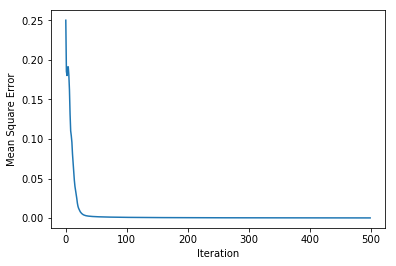

In [9]:
a_b_net=mlp_trainer(X_train_symmetry_A_B,y_train_symmetry_A_B,train_length=500)

## Trainning Evaluation

In [10]:
pd.DataFrame([[a_b_net.activate(X_test_symmetry_A_B[i]),y_test_symmetry_A_B[i]] for i in xrange(len(X_test_symmetry_A_B))])

,0,1
0,"[0.00985079307232, 0.0186374078498, 0.98050000...","[0, 0, 1]"
1,"[0.000864479179521, 0.971500428323, 0.00607798...","[0, 1, 0]"
2,"[0.468710567225, 0.0228593052283, 0.0211454291...","[0, 0, 0]"
3,"[0.467996834903, 0.0422668607191, 0.026174114551]","[0, 0, 0]"
4,"[0.000431094207523, 0.962073823517, 0.00875038...","[0, 1, 0]"


## Relational Response Symmetry Evaluation (B<-A)


In [11]:
symmetry_B_A=[
    [[0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0],[1,0,0]], #B-ACD O_1
    [[0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1],[1,0,0]], #B-ACE O_1
    [[0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0],[1,0,0]], #B-ADC O_1
    [[0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1],[1,0,0]], #B-ADE O_1
    [[0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0],[1,0,0]], #B-AEC O_1
    [[0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0],[1,0,0]], #B-AED O_1
    [[0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0],[0,1,0]], #B-CAD O_2
    [[0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],[0,1,0]], #B-CAE O_2
    [[0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0],[0,1,0]], #B-DAC O_2
    [[0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1],[0,1,0]], #B-DAE O_2
    [[0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0],[0,1,0]], #B-EAC O_2
    [[0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0],[0,1,0]], #B-EAD O_2
    [[0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0],[0,0,1]], #B-CDA O_3
    [[0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0],[0,0,1]], #B-CEA O_3
    [[0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0],[0,0,1]], #B-DCA O_3
    [[0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0],[0,0,1]], #B-DEA O_3
    [[0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0],[0,0,1]], #B-ECA O_3
    [[0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0],[0,0,1]] #B-EDA O_3
]

In [12]:
X_symmetry_B_A=[dat[0] for dat in symmetry_B_A]
y_symmetry_B_A=[dat[1] for dat in symmetry_B_A]

In [13]:
pd.DataFrame([[a_b_net.activate(X_symmetry_B_A[i]),y_symmetry_B_A[i]] for i in xrange(len(X_symmetry_B_A))])

,0,1
0,"[0.444139098542, 0.00362434634857, 0.061797774...","[1, 0, 0]"
1,"[0.123128539543, 0.00575731496494, 0.087177131...","[1, 0, 0]"
2,"[0.452845653672, 0.00500624439565, 0.066065032...","[1, 0, 0]"
3,"[0.0854893974823, 0.00435892343392, 0.11556357...","[1, 0, 0]"
4,"[0.17476406648, 0.00729763551749, 0.0526777951...","[1, 0, 0]"
5,"[0.0792278607198, 0.00488414465505, 0.08224576...","[1, 0, 0]"
6,"[0.0833438190382, 0.00347143427896, 0.36912996...","[0, 1, 0]"
7,"[0.0491344163111, 0.00706301180083, 0.15104843...","[0, 1, 0]"
8,"[0.0839933958079, 0.0042250258913, 0.377197906...","[0, 1, 0]"
9,"[0.0388326083825, 0.00479888030806, 0.17476436...","[0, 1, 0]"
